In [14]:
# Basic packages
import math

# Numerical python
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Package to read data files addressable with a URL.
import urllib.request

In [15]:
# Specify the location where the data files may be found.
indir = 'http://www.astronomy.ohio-state.edu/~terndrup/A3350/EBstar.dat'

# Display URL
print('Reading data from', indir)

# Open the file and save the file locator information
# in a variable.  Show the type of this object, to
# demonstrate that Python permits the definition of
# lots and lots of different object types.  Note the
# way we imported this function above.
lf = urllib.request.urlopen(indir)
print('Type of file locator object:', type(lf))

# Put the data into a numpy array.  Print some diagnostic
# information about the array. The boolean argument tells
# genfromtxt that the names of the data columns are included
# in the file.
Data = np.genfromtxt(lf, unpack=True, names=True)

print('')
print('Type of data object         :', type(Data))
print('Field names in the data file:', Data.dtype.names)
print('Number of data points       :', len(Data))


Reading data from http://www.astronomy.ohio-state.edu/~terndrup/A3350/EBstar.dat
Type of file locator object: <class 'http.client.HTTPResponse'>

Type of data object         : <class 'numpy.ndarray'>
Field names in the data file: ('BJD',)
Number of data points       : 97


In [16]:
# Confirm file works
print(Data)

[(2449494.634374,) (2449499.707904,) (2449500.976214,) (2449815.537006,)
 (2449830.757777,) (2449840.904807,) (2449853.588777,) (2449858.662277,)
 (2449872.614487,) (2449881.493207,) (2449947.449548,) (2450221.421561,)
 (2450222.689991,) (2450232.837271,) (2450241.715851,) (2450255.667991,)
 (2450259.473431,) (2450549.935025,) (2450566.423705,) (2450568.960775,)
 (2450624.769986,) (2450643.795676,) (2450717.362226,) (2450831.517558,)
 (2450870.837458,) (2450903.815719,) (2450931.720379,) (2450955.819539,)
 (2450969.771879,) (2450983.724229,) (2450993.871209,) (2450997.676449,)
 (2451007.823719,) (2451021.775889,) (2451026.849409,) (2451030.65466 ,)
 (2451058.55929 ,) (2451220.912921,) (2451224.718331,) (2451234.865291,)
 (2451253.891311,) (2451256.428201,) (2451267.843591,) (2451276.722261,)
 (2451281.795801,) (2451295.748071,) (2451299.553371,) (2451300.821831,)
 (2451309.700151,) (2451319.847611,) (2451375.656621,) (2451394.682801,)
 (2451616.650801,) (2451666.117801,) (2451678.80182

After inspecting the file, the smallest interval between periods is between 2450221.421561 and 2450222.689991

In [128]:
#Subtract the two to find preliminary period

p_days = 2450222.689991 - 2450221.421561
p_hours = p_days / 24

print('Days:',p_days)

print('Hours',p_hours)

Days: 1.2684300001710653
Hours 0.052851250007127724


In [18]:
# Turn data into an array
a = np.array([2449494.634374,2449499.707904, 2449500.976214, 2449815.537006,
 2449830.757777, 2449840.904807, 2449853.588777, 2449858.662277,
 2449872.614487, 2449881.493207,2449947.449548, 2450221.421561,
 2450222.689991, 2450232.837271,2450241.715851, 2450255.667991,
 2450259.473431, 2450549.935025,2450566.423705, 2450568.960775,
 2450624.769986, 2450643.795676,2450717.362226, 2450831.517558,
 2450870.837458, 2450903.815719,2450931.720379, 2450955.819539,
 2450969.771879, 2450983.724229,2450993.871209, 2450997.676449,
 2451007.823719, 2451021.775889,2451026.849409, 2451030.65466 ,
 2451058.55929 , 2451220.912921,2451224.718331, 2451234.865291,
 2451253.891311, 2451256.428201,2451267.843591, 2451276.722261,
 2451281.795801, 2451295.748071,2451299.553371, 2451300.821831,
 2451309.700151, 2451319.847611,2451375.656621, 2451394.682801,
 2451616.650801,2451666.117801,2451678.801821, 2451688.949001,
 2451738.416191,2451766.320801,2451780.273111, 2451995.899369,
 2452004.778289, 2452018.730549,2452032.682769, 2452037.756359,
 2452059.318739, 2452060.587299,2452084.686658, 2452089.760268,
 2452103.712518, 2452334.559406,2452853.331039, 2453082.909637,
 2453107.008807, 2453110.814067,2453115.887657, 2453120.961367,
 2453124.766317, 2453138.718937,2453143.792657, 2453153.939376,
 2453157.744726, 2453162.818546,2453176.770786, 2453472.305374,
 2453478.647434, 2453482.452594,2453766.571733, 2453832.528163,
 2453860.432643, 2453898.484343,2454149.625634, 2454210.508334,
 2454215.581894, 2454252.365284, 2454286.611705, 2454485.749016, 2454541.558136])

# Calculate days in between data
b = np.diff(a)

To find eclipse number, divide julian date by the prelimiary period 1.26 days

In [19]:
for j in range(len(a)):
    c = b / p_days
print(c)

[  3.99985021   0.99990539 247.99223604  11.99969332   7.99967676
   9.99973983   3.99982656  10.99959004   6.99977137  51.99840826
 215.99300944   1.           7.99987386   6.999661    10.99953486
   3.00011826 228.99300234  12.99928258   2.00016556  43.99865266
  14.99940083  57.99811577  89.99734474  30.99887262  25.99927548
  21.9993693   18.99920374  10.99969253  10.99970042   7.99963735
   2.99996058   7.99986598  10.99955851   3.99984232   2.99996925
  21.99934564 127.99573566   3.0000946    7.99962158  14.999661
   2.00002365   8.99962158   6.99973195   3.99985809  10.99963735
   3.00000788   1.00002365   6.99945602   8.00001577  43.9984942
  14.99978714 174.99428425  38.99860457   9.99977925   7.99979502
  38.99875436  21.99932988  10.99966888 169.99460591   6.99992905
  10.99962946  10.99959793   3.99989751  16.99926681   1.00010249
  18.99936062   3.99991328  10.99962158 181.99418807 408.98719908
 180.99429844  18.99921162   2.99997635   3.99989751   3.99999212
   2.99973195

Create a function for the eclipse times that adds the previous eclipse times

In [20]:
# assign preliminary eclipse numbers
def eclipse(c):
    M = []
    sum = 0
    for j in range(96):
        sum = sum + c[j]
        
        #convert to integers
        M.append("%.0f" %  sum)
        
    return M

In [21]:
eclipse(c)

['4',
 '5',
 '253',
 '265',
 '273',
 '283',
 '287',
 '298',
 '305',
 '357',
 '573',
 '574',
 '582',
 '589',
 '600',
 '603',
 '832',
 '845',
 '847',
 '891',
 '906',
 '964',
 '1054',
 '1085',
 '1111',
 '1133',
 '1152',
 '1163',
 '1174',
 '1182',
 '1185',
 '1193',
 '1204',
 '1208',
 '1211',
 '1233',
 '1361',
 '1364',
 '1372',
 '1387',
 '1389',
 '1398',
 '1405',
 '1409',
 '1420',
 '1423',
 '1424',
 '1431',
 '1439',
 '1483',
 '1498',
 '1673',
 '1712',
 '1722',
 '1730',
 '1769',
 '1791',
 '1802',
 '1972',
 '1979',
 '1990',
 '2001',
 '2005',
 '2022',
 '2023',
 '2042',
 '2046',
 '2057',
 '2239',
 '2648',
 '2829',
 '2848',
 '2851',
 '2855',
 '2859',
 '2862',
 '2873',
 '2877',
 '2885',
 '2888',
 '2892',
 '2903',
 '3136',
 '3141',
 '3144',
 '3368',
 '3420',
 '3442',
 '3472',
 '3670',
 '3718',
 '3722',
 '3751',
 '3778',
 '3935',
 '3979']

In [103]:
# Turn this data into an array

c = [0, 4,
 5,
 253,
 265,
 273,
 283,
 287,
 298,
 305,
 357,
 573,
 574,
 582,
 589,
 600,
 603,
 832,
 845,
 847,
 891,
 906,
 964,
 1054,
 1085,
 1111,
 1133,
 1152,
 1163,
 1174,
 1182,
 1185,
 1193,
 1204,
 1208,
 1211,
 1233,
 1361,
 1364,
 1372,
 1387,
 1389,
 1398,
 1405,
 1409,
 1420,
 1423,
 1424,
 1431,
 1439,
 1483,
 1498,
 1673,
 1712,
 1722,
 1730,
 1769,
 1791,
 1802,
 1972,
 1979,
 1990,
 2001,
 2005,
 2022,
 2023,
 2042,
 2046,
 2057,
 2239,
 2648,
 2829,
 2848,
 2851,
 2855,
 2859,
 2862,
 2873,
 2877,
 2885,
 2888,
 2892,
 2903,
 3136,
 3141,
 3144,
 3368,
 3420,
 3442,
 3472,
 3670,
 3718,
 3722,
 3751,
 3778,
 3935,
 3979]


Use least squares method to determine line of best fit for the data

In [129]:
Ones = np.ones(len(c))

LSQ_Matrix = np.vstack( (c, Ones) ).T
print('Array for solving fit:')
print(LSQ_Matrix)

slope, intcpt = np.linalg.lstsq( LSQ_Matrix, c, rcond=-1 )[0]
print( 'Derived slope is    :', round(slope,3) )
print( 'Derived intercept is:', round(intcpt,2) )

Array for solving fit:
[[0.000e+00 1.000e+00]
 [4.000e+00 1.000e+00]
 [5.000e+00 1.000e+00]
 [2.530e+02 1.000e+00]
 [2.650e+02 1.000e+00]
 [2.730e+02 1.000e+00]
 [2.830e+02 1.000e+00]
 [2.870e+02 1.000e+00]
 [2.980e+02 1.000e+00]
 [3.050e+02 1.000e+00]
 [3.570e+02 1.000e+00]
 [5.730e+02 1.000e+00]
 [5.740e+02 1.000e+00]
 [5.820e+02 1.000e+00]
 [5.890e+02 1.000e+00]
 [6.000e+02 1.000e+00]
 [6.030e+02 1.000e+00]
 [8.320e+02 1.000e+00]
 [8.450e+02 1.000e+00]
 [8.470e+02 1.000e+00]
 [8.910e+02 1.000e+00]
 [9.060e+02 1.000e+00]
 [9.640e+02 1.000e+00]
 [1.054e+03 1.000e+00]
 [1.085e+03 1.000e+00]
 [1.111e+03 1.000e+00]
 [1.133e+03 1.000e+00]
 [1.152e+03 1.000e+00]
 [1.163e+03 1.000e+00]
 [1.174e+03 1.000e+00]
 [1.182e+03 1.000e+00]
 [1.185e+03 1.000e+00]
 [1.193e+03 1.000e+00]
 [1.204e+03 1.000e+00]
 [1.208e+03 1.000e+00]
 [1.211e+03 1.000e+00]
 [1.233e+03 1.000e+00]
 [1.361e+03 1.000e+00]
 [1.364e+03 1.000e+00]
 [1.372e+03 1.000e+00]
 [1.387e+03 1.000e+00]
 [1.389e+03 1.000e+00]
 [1.398e+03

Plot the data

Text(0, 0.5, 'Julian Date')

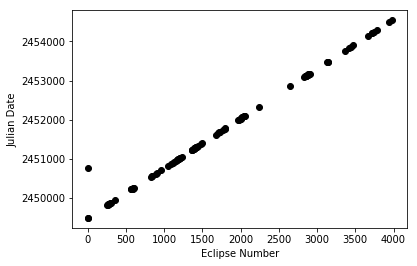

In [109]:
plt.plot(c, a, 'ok')
plt.xlabel('Eclipse Number')
plt.ylabel('Julian Date')

Use functions to find line of best fit using least squares

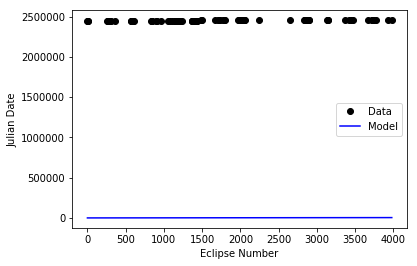

In [114]:
# Find the minimum and maximum x-values.

min_x = np.amin(c)
max_x = np.amax(c)

# Create an array of x values that run from the
# minimum to the maximum value.

npts  = 100
xmodel = np.linspace(min_x, max_x, npts, endpoint=True)

# For each one of the points in this array, compute the
# y-value of the model using a list comprehension.

ymodel = [slope * x + intcpt for x in xmodel]

# Make the plot 
plt.plot(c, a, 'ok', label='Data')
plt.plot(xmodel, ymodel, 'blue', label='Model')
plt.xlabel('Eclipse Number')
plt.ylabel('Julian Date')
plt.legend()

Find and plot the residuals

Text(0.5, 1.0, 'Fit statistic =  9632022.0')

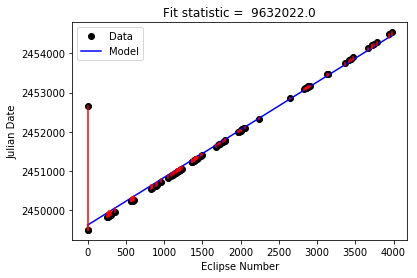

In [119]:
# Make one stray value and refit.

Y2 = a           # Copy
idx = 1          # Arbitrarily chosen
Y2[idx] = Y2[idx] + 633.

# Fit straight line to our X and Y arrays.
# (Use the codes elsewhere in this notebook)
# Plot the results.

Ones = np.ones(len(c))
LSQ_Matrix = np.vstack( (c, Ones) ).T
slope, intcpt = np.linalg.lstsq( LSQ_Matrix, a, rcond=-1 )[0]
ymodel = [slope * x + intcpt for x in xmodel]
ycalc = [slope * x + intcpt for x in c]


#Function for fit statistic

def sq_resid(ycalc, a):
    """
    Function to return the sum of the squares of the residuals
    between some y data values and the values of a model calculated
    for each data point.
    
    Arguments:
    (1) an array of model values for each point
    (2) an array of data values
    """
    
    sum = 0.0
    for j in range(len(ycalc)):
        sum = sum + (ycalc[j] - a[j])**2
        
    return sum

# Assign function to variable
fitstat = sq_resid(ycalc, a)

# Make the plot 
plt.plot(c, a, 'ok', label='Data')
plt.plot(xmodel, ymodel, 'blue', label='Model')
plt.xlabel('Eclipse Number')
plt.ylabel('Julian Date')
plt.legend()

for j in range(len(c)):
    # Tuple of x values for each line representing a residual
    xpts = ( c[j], c[j] )
    #Same for y
    ypts = ( a[j], ycalc[j] )
    # Draw
    plt.plot( xpts, ypts, 'red')


topstring = 'Fit statistic = {0:10.1f}'.format(fitstat)
plt.title(topstring) 

In [124]:
print('Residuals:')
for  j in range(len(c)):
    R = (a[j]-ycalc[j])
    print("%.2f" % (R))

Residuals:
-121.91
3043.29
-121.66
-109.02
-108.41
-108.00
-107.49
-107.29
-106.73
-106.37
-103.72
-92.71
-92.66
-92.25
-91.90
-91.34
-91.18
-79.51
-78.85
-78.75
-76.51
-75.74
-72.79
-68.20
-66.62
-65.30
-64.17
-63.21
-62.65
-62.09
-61.68
-61.52
-61.12
-60.56
-60.35
-60.20
-59.08
-52.56
-52.40
-52.00
-51.23
-51.13
-50.67
-50.31
-50.11
-49.55
-49.40
-49.35
-48.99
-48.58
-46.34
-45.57
-36.66
-34.67
-34.16
-33.75
-31.76
-30.64
-30.08
-21.42
-21.06
-20.50
-19.94
-19.74
-18.87
-18.82
-17.85
-17.65
-17.09
-7.81
13.03
22.25
23.22
23.37
23.58
23.78
23.93
24.49
24.70
25.11
25.26
25.46
26.02
37.90
38.15
38.30
49.72
52.37
53.49
55.02
65.11
67.55
67.76
69.24
70.61
78.61
80.85


In [125]:
#Residuals as an array
R = np.array([ -121.91,
3043.29,
-121.66,
-109.02,
-108.41,
-108.00,
-107.49,
-107.29,
-106.73,
-106.37,
-103.72,
-92.71,
-92.66,
-92.25,
-91.90,
-91.34,
-91.18,
-79.51,
-78.85,
-78.75,
-76.51,
-75.74,
-72.79,
-68.20,
-66.62,
-65.30,
-64.17,
-63.21,
-62.65,
-62.09,
-61.68,
-61.52,
-61.12,
-60.56,
-60.35,
-60.20,
-59.08,
-52.56,
-52.40,
-52.00,
-51.23,
-51.13,
-50.67,
-50.31,
-50.11,
-49.55,
-49.40,
-49.35,
-48.99,
-48.58,
-46.34,
-45.57,
-36.66,
-34.67,
-34.16,
-33.75,
-31.76,
-30.64,
-30.08,
-21.42,
-21.06,
-20.50,
-19.94,
-19.74,
-18.87,
-18.82,
-17.85,
-17.65,
-17.09,
-7.81,
13.03,
22.25,
23.22,
23.37,
23.58,
23.78,
23.93,
24.49,
24.70,
25.11,
25.26,
25.46,
26.02,
37.90,
38.15,
38.30,
49.72,
52.37,
53.49,
55.02,
65.11,
67.55,
67.76,
69.24,
70.61,
78.61,
80.85,])

print('Period:', slope)

std_of_resid = np.std(R)

error_values = [ std_of_resid for x in a ]
print("Standard deviation:", std_of_resid)

Period: 1.2174310715443064
Standard deviation: 315.1175554969582


The residuals are hard to see on the graph because all of the data is so similar and close together in numerical value so a different graph might be more appropiate for displaying them

Create a functions to convert the residuals into seconds

In [126]:
def residuals(R):
    S = []
    sum = 0
    for j in range(len(c)):
        sum = R[j] * 86400
        
        #convert to integers
        S.append("%.0f" %  sum)
        
    return S

In [127]:
print('Residuals in seconds:')
residuals(R)

Residuals in seconds:


['-10533024',
 '262940256',
 '-10511424',
 '-9419328',
 '-9366624',
 '-9331200',
 '-9287136',
 '-9269856',
 '-9221472',
 '-9190368',
 '-8961408',
 '-8010144',
 '-8005824',
 '-7970400',
 '-7940160',
 '-7891776',
 '-7877952',
 '-6869664',
 '-6812640',
 '-6804000',
 '-6610464',
 '-6543936',
 '-6289056',
 '-5892480',
 '-5755968',
 '-5641920',
 '-5544288',
 '-5461344',
 '-5412960',
 '-5364576',
 '-5329152',
 '-5315328',
 '-5280768',
 '-5232384',
 '-5214240',
 '-5201280',
 '-5104512',
 '-4541184',
 '-4527360',
 '-4492800',
 '-4426272',
 '-4417632',
 '-4377888',
 '-4346784',
 '-4329504',
 '-4281120',
 '-4268160',
 '-4263840',
 '-4232736',
 '-4197312',
 '-4003776',
 '-3937248',
 '-3167424',
 '-2995488',
 '-2951424',
 '-2916000',
 '-2744064',
 '-2647296',
 '-2598912',
 '-1850688',
 '-1819584',
 '-1771200',
 '-1722816',
 '-1705536',
 '-1630368',
 '-1626048',
 '-1542240',
 '-1524960',
 '-1476576',
 '-674784',
 '1125792',
 '1922400',
 '2006208',
 '2019168',
 '2037312',
 '2054592',
 '2067552',
 '21

The first Julian date, 2449494, is calender date May 21, 1994.
The last Julian date, 2454541, is calender date March 15,2008.

Obersevations 6 months from now would be taken November 1st, 2020 or 2459154.5 in Julian terms.
This would extend past the last date collected by 12 years and 9 months. 

There are 97 data points from 10 months and 13 years 97/13.8 is about 7 data points per year. 12.75 * 7 = 89 data points. This is an about 92% increase in the total span of obersvations of this star.